# 머신러닝 - 분류(Classification)

주제
- 지도학습: 분류 모델
- Logistic Regression
- Decision Tree

### None 값을 채워보세요!

## 예제 실습 - Logistic Regression


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

# 0: 불합격, 1: 합격
data = pd.DataFrame({
    '공부시간' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    '합격여부' : [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
})

# 데이터 분리
X = data[["공부시간"]]
y = data["합격여부"]

# 모델 생성 및 학습
model =  LogisticRegression()
model.fit(X,y)

# 새로운 데이터에 대한 예측(0=불합격, 1=합격)
new_test = np.array([[3], [5], [8]]) # 공부시간 3, 5, 8인 학생의 합격 예측

y_prob = model.predict_proba(new_test) # 합격확률을 반환하는 메서드 
y_pred = model.predict(new_test) # 최종 예측  가연속적인 숫자값(실수) 을 반환 ,분류(Classification) 모델에서 [0, 1, 0, 1, 1] 회귀(Regression) 모델에서 [5342.1, 4211.7, 3891.2, ...]

print(f'예측 확률: {y_prob}')
print(f'최종 예측: {y_pred}')

AttributeError: 'DataFrame' object has no attribute '_validate_params'

## 예제 실습 - Decision Tree


예측 성능: 1.0


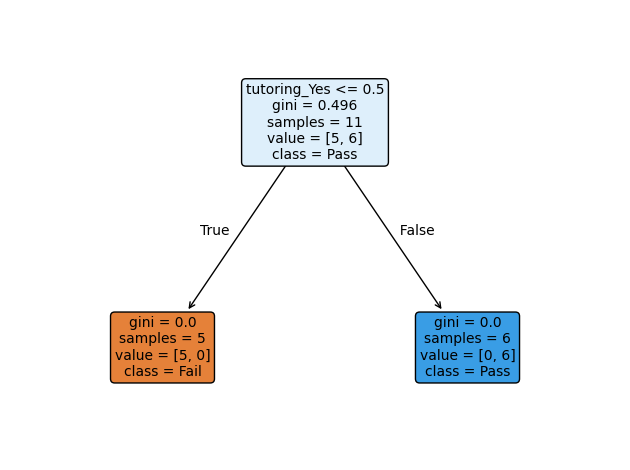

트리 깊이: 1
리프 노드 개수: 2
핵심 피처 중요도: {'study_hours': np.float64(0.0), 'sleep_hours': np.float64(0.0), 'tutoring_Yes': np.float64(1.0)}


In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

df = pd.DataFrame({
    "study_hours": [2, 3, 4, 6, 7, 8, 9, 5, 5, 7, 6, 4, 3, 8],
    "sleep_hours": [8, 7, 6, 6, 5, 5, 4, 7, 6, 5, 7, 6, 7, 5],
    "tutoring": ["No", "No", "No", "Yes", "Yes", "Yes", "Yes", "No", "Yes", "Yes", "No", "No", "No", "Yes"],
    "pass": [0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1]
})

# 데이터 분리 및 데이터 분할
# 범주형 데이터 인코딩
X = pd.get_dummies(df.drop(columns=["pass"]), drop_first=True)  #독립변수 (공부시간,수면시간,튜터링 여부)
'''
drop_first=True 불필요한 중복을 제거하기 위해(drop_first=True) 생성되는 첫번째 범주 컬럼삭제
tutoring_yes
0
1

'''
#훈련/테스트 셋 분할(8:2)
y =  df["pass"]  #종속변수(시험합격 여부)
X_train,X_test,y_train,y_test = train_test_split(
        X,y,test_size=0.2,random_state=42
)

# 모델 생성 및 학습
clf = DecisionTreeClassifier(
    #불순도 지표기준(gini;디폴트,entropy, log_loss)
    criterion="gini",
    max_depth=3,
    random_state=42

)
clf.fit(X_train,y_train) # 훈련데이터로 학습 훈련(= 트리가 만들어지는 과정) 
# 예측 및 정확도 평가
y_pred = clf.predict(X_test) #예측 진행
print(f'예측 성능: {accuracy_score(y_test, y_pred)}') #실제 답과 예측 값 비교

# 트리 시각화: plot_tree 활용
plot_tree(
    clf, # 학습한 트리모델
    feature_names=X.columns, #독립변수들의 "이름" 목록 
    class_names=['Fail', 'Pass'], # 분류되는 타겟의 각 범주 값(class)의 목록
    filled=True,
    rounded=True,
    fontsize=10
)

plt.tight_layout()
plt.show()

# 트리 정보 출력하기 (깊이, 리프 노드 수, 중요 feature)
print(f'트리 깊이: {clf.get_depth()}')
print(f'리프 노드 개수: {clf.get_n_leaves()}')
print(f'핵심 피처 중요도: {dict(zip(X.columns, clf.feature_importances_))}') #feature_importances_:모델 학습에 사용된 가장중요한 feature들을 반환


## 시험 합격 예측

한 학원에서 학생들의 학습 시간과 이전 시험 점수를 바탕으로 최종 시험 합격 여부를 예측하려고 합니다. Logistic Regression을 사용하여 학생의 합격 가능성을 예측하는 모델을 만들어보세요.

요구사항

1. 주어진 데이터셋을 train/test로 분리하세요 (test_size=0.2)
2. Logistic Regression 모델을 학습시키세요
3. 테스트 데이터에 대한 정확도를 출력하세요
4. 새로운 학생(학습시간=7, 이전점수=85)의 합격 여부를 예측하세요

예상 결과 출력
```
테스트 정확도: 1.00
예측 결과: 합격
합격 확률: 0.9999999367826911
```


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

data = {
    "study_time": [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 1, 2, 8, 9, 10],
    "previous_score": [50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 45, 48, 88, 92, 96],
    "pass": [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1]
}

df = pd.DataFrame(data)

# 1. 데이터를 X, y로 분리하고, 훈련셋과 테스트셋으로 분리하세요
X = df[["study_time","previous_score"]]
y = df["pass"]
X_train,X_test,y_train,y_test = train_test_split(
        X,y,test_size=0.2,random_state=42
)

# 2. 모델 생성과 학습을 진행하세요.
model = LogisticRegression()
model.fit(X,y)


# 3. 테스트셋으로 예측 후, 정확도를 출력하세요.
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'테스트 정확도: {accuracy:.2f}')

# 4. 새로운 학생에 대한 예측 진행
new_students = np.array([[7, 85]]) # 공부시간=7, 이전 시험점수=85

new_pred = model.predict(new_students) # 새로운 학생에 대한 예측
probability = model.predict_proba(new_students) # 예측 확률을 구하세요
print(f'예측 결과: {"합격" if new_pred[0] == 1 else "불합격"}')
print(f'합격 확률: {probability[0][1]}') # [0]: 첫번째 행, [1]: '합격' 레이블

테스트 정확도: 1.00
예측 결과: 합격
합격 확률: 0.9999999374258869


c:\Users\USER\miniconda3\envs\sesac_mingyo\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\USER\miniconda3\envs\sesac_mingyo\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## 과일 분류

과일 가게에서 무게와 색상 점수를 기반으로 과일을 사과와 오렌지로 분류하려고 합니다. Decision Tree를 사용하여 과일을 분류하는 모델을 만들고, 의사결정 규칙을 확인해보세요.

요구사항

1. 주어진 데이터로 Decision Tree 모델을 학습시키세요 (max_depth=3)
2. 테스트 데이터에 대한 정확도를 출력하세요
3. 특성 중요도(feature importance)를 출력하세요
4. 새로운 과일(무게=180g, 색상점수=7)을 분류하세요

예상 결과 출력
```
테스트 정확도: 1.0
 무게: 1.000
 색상점수: 0.000

예측 결과: 오렌지
```

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = {
    "weight": [150, 170, 140, 130, 160,
               180, 200, 190, 210, 195,
               145, 155, 185, 205, 175],
    "color_score": [8, 9, 7, 8, 9,
                    3, 4, 3, 2, 4,
                    7, 8, 3, 2, 4],
    "label": [0, 0, 0, 0, 0,
              1, 1, 1, 1, 1,
              0, 0, 1, 1, 1]
}

df = pd.DataFrame(data)

# 1. 데이터 분리와 분할(test_size=0.2)을 수행하세요. 
X = df[["weight","color_score"]]
y = df["label"]

X_train,X_test,y_train,y_test = train_test_split(
        X,y,test_size=0.2,random_state=42
)


# 2. 모델 생성 및 학습
model = DecisionTreeClassifier(
    criterion="gini",max_depth=3, random_state=42)
model.fit(X_train,y_train)

# 3. 테스트셋으로 예측 후, 정확도 출력
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'테스트 정확도: {accuracy}')

# 4. 특성 중요도 출력
importances = model.feature_importances_

for name, importance in zip(['무게', '색상점수'], importances):
    print(f' {name}: {importance:.3f}')

# # 5. 새로운 과일 예측
new_fruit = np.array([[180, 7]])

prediction = model.predict(new_fruit)
print(f"\n예측 결과: {'오렌지' if prediction[0] == 1 else '사과'}")

테스트 정확도: 1.0
 무게: 1.000
 색상점수: 0.000
[1]

예측 결과: 오렌지


c:\Users\USER\miniconda3\envs\sesac_mingyo\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## 이메일 스팸 필터 만들기

이메일 서비스에서 특정 단어의 출현 빈도를 기반으로 스팸 메일을 자동으로 분류하는 시스템을 만들려고 합니다. '무료', '할인' 등의 단어 출현 횟수를 특성으로 사용하여 스팸 여부를 예측하는 Logistic Regression 모델을 만들어보세요.

요구사항

1. 주어진 데이터를 train/test로 분리하세요 (test_size=0.25, random_state=42)
2. Logistic Regression 모델을 학습시키고 정확도를 출력하세요
3. 새로운 이메일 3개에 대해 스팸 확률과 예측 결과를 출력하세요

예상 결과 출력
```
테스트 정확도: 1.00
이메일 1 (무료:1회, 할인:1회)
  예측: 스팸
  스팸 확률: 19.06%
```


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# free_count: 무료 출현 횟수, discount_count: 할인 출현 횟수, spam: 스팸 여부
df = pd.DataFrame({
    "free_count": [0, 0, 1, 1, 0,
                   2, 1, 2, 3, 2,
                   3, 4, 2, 4, 3,
                   5, 4, 5, 6, 5],
    
    "discount_count": [0, 1, 0, 1, 2,
                       0, 2, 1, 2, 3,
                       3, 2, 4, 3, 4,
                       3, 5, 4, 5, 6],
    
    "spam": [0, 0, 0, 0, 0,
             0, 0, 1, 1, 1,
             1, 1, 1, 1, 1,
             1, 1, 1, 1, 1]
})

# 데이터 분리, 분할(test_size=0.25) 수행
X = df[["free_count","discount_count"]]
y = df["spam"]

X_train,X_test,y_train,y_test = train_test_split(
        X,y,test_size=0.2,random_state=42
)


# 모델 생성 및 학습
model = LogisticRegression()
model.fit(X,y)

# 테스트 데이터셋으로 정확도 평가
y_pred = model.predict(X_test) #예측 진행
print(y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f'테스트 정확도: {accuracy:.2f}')

# 새로운 이메일 예측 수행(예측 확률, 최종 예측)
new_emails = np.array([
    [1, 1],   # 이메일 1: 무료 1번, 할인 1번
    [0, 0],   # 이메일 2: 무료 0번, 할인 0번
    [5, 4]    # 이메일 3: 무료 5번, 할인 4번
])

predictions = model.predict(new_emails)
print(predictions)
probabilities = model.predict_proba(new_emails)
print(probabilities)
for i, (email, pred, prob) in enumerate(zip(new_emails, predictions, probabilities), 1):
    print(f"이메일 {i} (무료:{email[0]}회, 할인:{email[1]}회)")
    print(f"  예측: {'스팸' if pred == 1 else '정상'}")
    print(f"  스팸 확률: {prob[1]:.2%}")
    print()



[0 1 1 0]
테스트 정확도: 1.00
[0 0 1]
[[0.82116289 0.17883711]
 [0.97642398 0.02357602]
 [0.00166148 0.99833852]]
이메일 1 (무료:1회, 할인:1회)
  예측: 정상
  스팸 확률: 17.88%

이메일 2 (무료:0회, 할인:0회)
  예측: 정상
  스팸 확률: 2.36%

이메일 3 (무료:5회, 할인:4회)
  예측: 스팸
  스팸 확률: 99.83%



c:\Users\USER\miniconda3\envs\sesac_mingyo\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\USER\miniconda3\envs\sesac_mingyo\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## 타이타닉 생존자 예측

Titanic 데이터셋은 1912년 타이타닉호 침몰 사고에서 승객들의 생존 여부를 다룬 유명한 데이터셋입니다. 승객의 나이, 성별, 객실 등급 등의 정보를 바탕으로 생존 여부를 예측하는 Decision Tree 모델을 만들어봅니다.

* 타겟: Survived (0: 사망, 1: 생존)

`titanic3.csv` 파일을 읽고 아래 요구사항을 따르세요.

요구사항

1. Titanic 데이터셋을 로드하고 기본 정보를 확인하세요
2. 결측치를 처리하고 범주형 변수를 인코딩하세요
  - 'age'와 'fare' 컬럼을 각각 중앙 값으로 채우세요.
  - 'sex' 컬럼을 인코딩하세요. (여기서는 단순하게 pandas의 map()을 활용하세요.)
3. (선택) 자유롭게 EDA 과정을 거쳐보세요!
4. 데이터를 train/test로 분리하세요 (test_size=0.2, random_state=42)
5. Decision Tree 모델을 학습하고 테스트 정확도를 출력하세요.
6. 특성 중요도를 출력하세요.
7. 트리 구조를 출력하고 주요 결정 규칙을 출력하세요.
8. 테스트 데이터에 대한 예측 결과를 분석하세요.

예상 결과 출력(일부분)
```
테스트 정확도: 0.76

트리 깊이: 4
리프 노드 수: 16

새로운 승객 예측:
[1 0 1]
```

In [45]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# # 1. 데이터 로드 및 기본 구조 확인
df = pd.read_csv("titanic3.csv")
# # 2. 데이터 전처리
# # 모델에 사용할 feature만 추출합니다. (pclass, sex, age, sibsp, parch, fare, survived)
# # 사용할 feature 이름 리스트를 정의하세요.
features = ["pclass","sex","age","sibsp","parch","fare","survived"]
df = df[features].copy()
# # 2-1. 결측치 처리
df["age"] =  df.fillna(df['age'].median(),inplace=True)
df["fare"] =  df.fillna(df['fare'].median(),inplace=True)
df.isna().sum()
# # 2-2. 인코딩
df["sex"] = df["sex"].map({"male":0,"female":1})
# # 3. EDA 과정을 거쳐보세요! (선택)
print(df.info())
# # 4. 데이터 X,y 분리 + 데이터 분할
X = None
y = None

# None

print(f'Train Size: {X_train.shape}')
print(f'Test Size: {X_test.shape}')

# # 5. 모델 생성 및 학습
model = None
None

# # 6. 테스트 데이터로 예측 및 정확도 구하기
y_pred = None
accuracy = None
print(f'테스트 정확도: {accuracy:.3f}')

# # 7. 특성 중요도
importances = None
feature_importance_df = pd.DataFrame({
    '특성 이름': None,
    '중요도': None
}).sort_values('중요도', ascending=False)

print(feature_importance_df)

# # 8. 트리 구조 출력
tree_rules = export_text(model, feature_names=X.columns)
print(tree_rules)

# # 9. 트리 시각화(plot_tree)
plot_tree(None, 
          feature_names=None,
          class_names=['사망', '생존'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title(f'Decision Tree (max_depth=4)')
plt.tight_layout()
plt.show()

# # 10. 트리 정보 출력
print(f"\n트리 깊이: {model.None}")
print(f"리프 노드 수: {model.None}")

# # 11. 새로운 승객 예측
new_passengers = pd.DataFrame({
    'pclass': [1, 3, 2],
    'sex': [1, 0, 1],  # 1: female, 0: male
    'age': [25, 30, 40],
    'sibsp': [0, 1, 1],
    'parch': [0, 2, 0],
    'fare': [100, 15, 50]
})

print("\n새로운 승객 예측:")
predictions = None

print(predictions)

SyntaxError: f-string: invalid syntax (3928365926.py, line 65)